In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
# import the seattle home sales dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

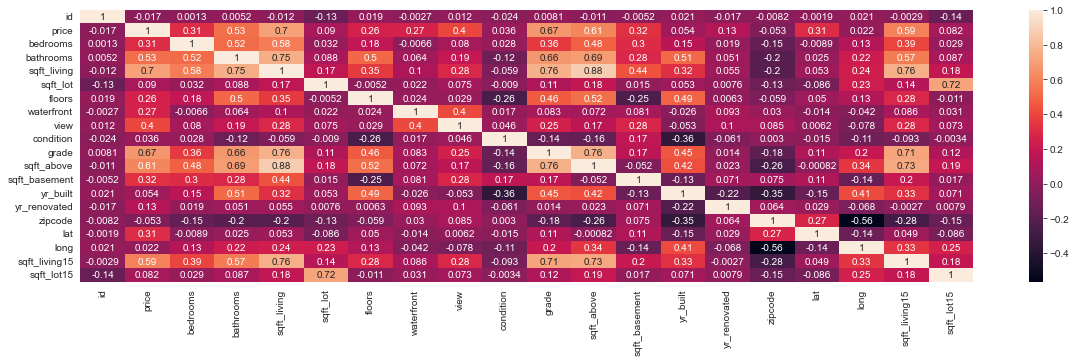

In [3]:
# run a correlation heatmap to understand the features most correlated with price
sns.heatmap(df.corr(), annot = True)

In [5]:
# drop features not well correlated nd see the correlation of the remaining features
nums = df.corr()['price'].sort_values(ascending = False).drop(['id', 'zipcode', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', 'yr_renovated', 'price', 'lat'])
nums

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
Name: price, dtype: float64

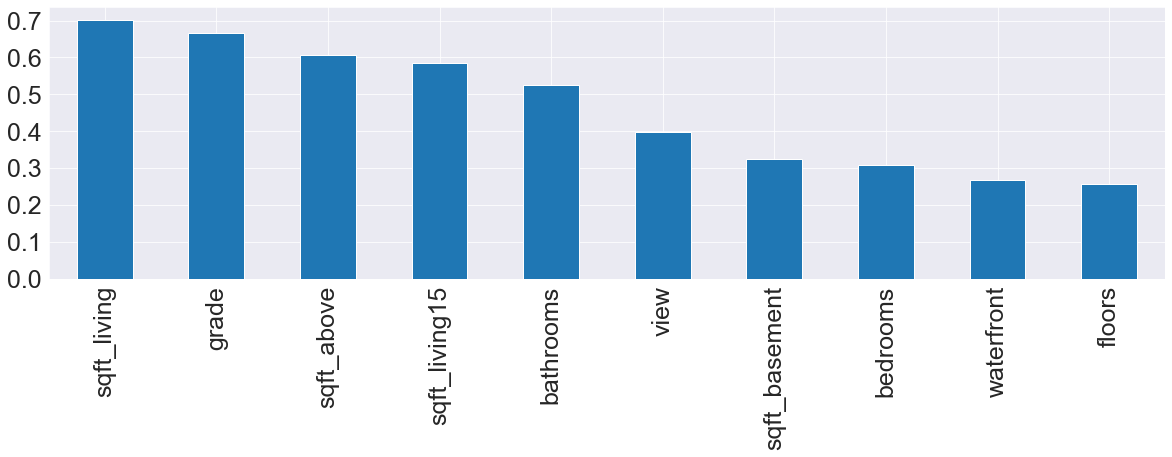

In [6]:
# make a bar chart of the correlations and sort from most to least correlated
df.corr()['price'].sort_values(ascending = False).drop(['id', 'zipcode', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', 'yr_renovated', 'price', 'lat']).plot(kind='bar', fontsize=25)
plt.savefig('kc_correlations.png', transparent = True, bbox_inches="tight", dpi=600)

In [11]:
# we will need to remove sq_ft above in order reduce collinearity in our dataset analysis
# next we define the independent variables
indi_var = df[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade',
       'sqft_basement', 'sqft_living15']]
dep_var = df['price']

In [12]:
# add constants with the indi vars and define a regression model
indi_var = sm.add_constant(indi_var)
regression_model = sm.OLS(dep_var,indi_var).fit() 
regression_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3544.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:43:25   Log-Likelihood:            -2.9781e+05
No. Observations:               21613   AIC:                         5.956e+05
Df Residuals:                   21603   BIC:                         5.957e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.952e+05   1.44e+04    -34.457      0.000   -5.23e+05   -4.67e+05
bedrooms      -2.934e+04   2171.351    -13.513      0.000   -3.36e+04   -2.51e+04
bathrooms     -1.768e+04   3523.403     -5.018      0.000   -2.46e+04   -1.08e+04
sqft_living     179.8455      4.114     43.716      0.000     171.782     187.909
floors        -1.018e+04   3974.509     -2.561      0.010    -1.8e+04   -2389.885
waterfront     5.879e+05   2.01e+04     29.266      0.000    5.49e+05    6.27e+05
view           6.123e+04   2427.832     25.219      0.000    5.65e+04     6.6e+04
grade          1.004e+05   2392.682     41.950      0.000    9.57e+04    1.05e+05
sqft_basement    45.1901      4.827      9.362      0.000      35.729      54.652
sqft_living15     6.1645      3.863      1.596      0.111      -1.407      13.736
==============================================================================
Omnibus:                    15557.695   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901418.455
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      34.110   Cond. No.                     3.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

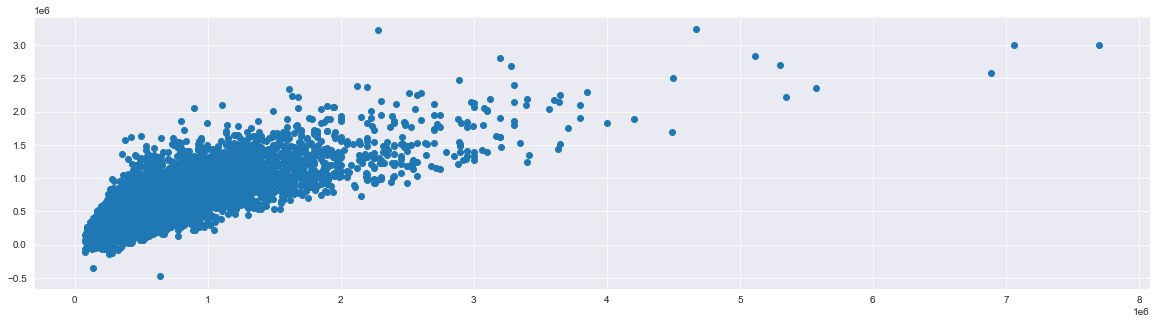

In [13]:
#visulize the comparison of forecasted results to actual
prediction = regression_model.predict(indi_var)
plt.scatter(df['price'],prediction)
plt.savefig('orig_regression_kc.png', transparent = True, bbox_inches="tight", dpi=600)


In [10]:
#let's look at the available features again to see how we can improve on the model
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
# add dummy variables for the zip code feature so python can look at it categorically (string)
indi_var['zipcode'] = df['zipcode'].astype(str)
indi_var = pd.get_dummies(indi_var) # we need this step to include zip code (categorical) in a regression
indi_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 150 entries, const to zipcode_98199
dtypes: float64(3), int64(7), uint8(140)
memory usage: 4.5 MB


In [16]:
# rerun the regression model with the newly added additional zip code feature
regression_model = sm.OLS(dep_var,indi_var).fit() 
regression_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1127.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:48:47   Log-Likelihood:            -2.9003e+05
No. Observations:               21613   AIC:                         5.802e+05
Df Residuals:                   21534   BIC:                         5.809e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.348e+05   1.06e+04    -12.722      0.000   -1.56e+05   -1.14e+05
bedrooms      -2.455e+04   1542.776    -15.914      0.000   -2.76e+04   -2.15e+04
bathrooms       1.29e+04   2506.773      5.144      0.000    7981.543    1.78e+04
sqft_living     221.2869      2.964     74.664      0.000     215.478     227.096
floors        -6.633e+04   2985.671    -22.216      0.000   -7.22e+04   -6.05e+04
waterfront     6.675e+05   1.43e+04     46.665      0.000    6.39e+05    6.96e+05
view            5.91e+04   1771.463     33.360      0.000    5.56e+04    6.26e+04
grade          4.885e+04   1758.006     27.786      0.000    4.54e+04    5.23e+04
sqft_basement   -81.2702      3.652    -22.252      0.000     -88.429     -74.112
sqft_living15     8.7976      2.914      3.019      0.003       3.085      14.510
zipcode_98001 -1.085e+05   4279.609    -25.346      0.000   -1.17e+05      -1e+05
zipcode_98002 -8.836e+04   5765.987    -15.324      0.000   -9.97e+04   -7.71e+04
zipcode_98003 -1.155e+05   4856.893    -23.786      0.000   -1.25e+05   -1.06e+05
zipcode_98004  2.878e+05   4646.740     61.943      0.000    2.79e+05    2.97e+05
zipcode_98005  5.135e+04   6306.230      8.143      0.000     3.9e+04    6.37e+04
zipcode_98006  3.214e+04   3786.789      8.487      0.000    2.47e+04    3.96e+04
zipcode_98007  2.147e+04   6827.483      3.145      0.002    8086.943    3.49e+04
zipcode_98008  2.222e+04   4853.132      4.578      0.000    1.27e+04    3.17e+04
zipcode_98010 -6.785e+04   8075.015     -8.402      0.000   -8.37e+04    -5.2e+04
zipcode_98011 -4.748e+04   5809.501     -8.173      0.000   -5.89e+04   -3.61e+04
zipcode_98014 -5.457e+04   7261.847     -7.515      0.000   -6.88e+04   -4.03e+04
zipcode_98019 -6.471e+04   5886.806    -10.993      0.000   -7.63e+04   -5.32e+04
zipcode_98022 -1.042e+05   5326.199    -19.556      0.000   -1.15e+05   -9.37e+04
zipcode_98023 -1.252e+05   3667.454    -34.126      0.000   -1.32e+05   -1.18e+05
zipcode_98024 -2.114e+04   8973.688     -2.356      0.018   -3.87e+04   -3552.049
zipcode_98027 -2.005e+04   4050.295     -4.950      0.000    -2.8e+04   -1.21e+04
zipcode_98028 -4.742e+04   4829.009     -9.820      0.000   -5.69e+04    -3.8e+04
zipcode_98029 -1586.8400   4596.390     -0.345      0.730   -1.06e+04    7422.425
zipcode_98030 -1.065e+05   5076.400    -20.987      0.000   -1.16e+05   -9.66e+04
zipcode_98031 -9.894e+04   4909.236    -20.155      0.000   -1.09e+05   -8.93e+04
zipcode_98032     -1e+05   7234.358    -13.827      0.000   -1.14e+05   -8.59e+04
zipcode_98033  7.818e+04   3939.370     19.847      0.000    7.05e+04    8.59e+04
zipcode_98034 -6671.2556   3515.204     -1.898      0.058   -1.36e+04     218.806
zipcode_98038 -9.412e+04   3409.770    -27.602      0.000   -1.01e+05   -8.74e+04
zipcode_98039  5.619e+05   1.15e+04     48.902   

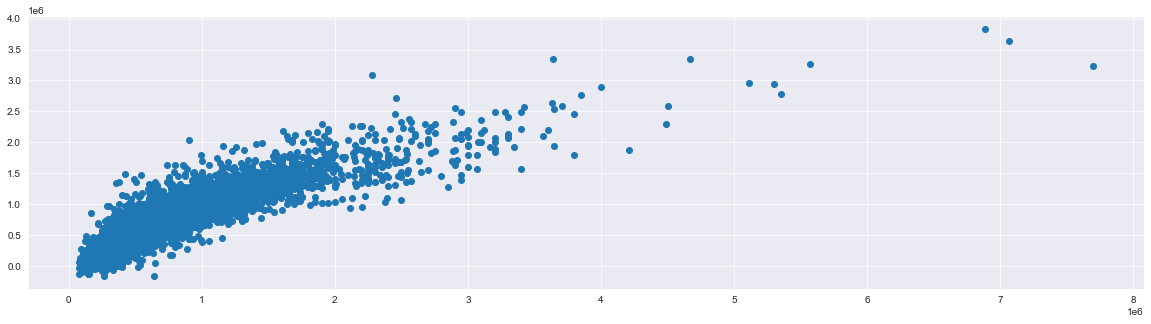

In [17]:
#visualize the second attempt at the model
prediction = regression_model.predict(indi_var)
plt.scatter(df['price'],prediction)
plt.savefig('regression_withdummyvar_kc.png', transparent = True, bbox_inches="tight", dpi=600)

In [18]:
# let's see if we can improve the model by making a log10 of the price
dep_var = np.log10(df['price'])
regression_model = sm.OLS(dep_var,indi_var).fit() 
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1831.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:50:00   Log-Likelihood:                 23180.
No. Observations:               21613   AIC:                        -4.620e+04
Df Residuals:                   21534   BIC:                        -4.557e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9796      0.005    924.571      0.000       4.969       4.990
bedrooms          0.0023      0.001      2.899      0.004       0.001       0.004
bathrooms         0.0137      0.001     10.727      0.000       0.011       0.016
sqft_living     9.35e-05   1.51e-06     62.045      0.000    9.05e-05    9.65e-05
floors           -0.0253      0.002    -16.672      0.000      -0.028      -0.022
waterfront        0.2036      0.007     27.987      0.000       0.189       0.218
view              0.0275      0.001     30.485      0.000       0.026       0.029
grade             0.0370      0.001     41.446      0.000       0.035       0.039
sqft_basement -3.146e-05   1.86e-06    -16.940      0.000   -3.51e-05   -2.78e-05
sqft_living15  3.502e-05   1.48e-06     23.633      0.000    3.21e-05    3.79e-05
zipcode_98001    -0.0314      0.002    -14.446      0.000      -0.036      -0.027
zipcode_98002    -0.0347      0.003    -11.820      0.000      -0.040      -0.029
zipcode_98003    -0.0296      0.002    -11.971      0.000      -0.034      -0.025
zipcode_98004     0.2079      0.002     88.011      0.000       0.203       0.213
zipcode_98005     0.1301      0.003     40.566      0.000       0.124       0.136
zipcode_98006     0.1049      0.002     54.459      0.000       0.101       0.109
zipcode_98007     0.1114      0.003     32.100      0.000       0.105       0.118
zipcode_98008     0.1099      0.002     44.534      0.000       0.105       0.115
zipcode_98010     0.0306      0.004      7.454      0.000       0.023       0.039
zipcode_98011     0.0638      0.003     21.590      0.000       0.058       0.070
zipcode_98014     0.0425      0.004     11.513      0.000       0.035       0.050
zipcode_98019     0.0412      0.003     13.775      0.000       0.035       0.047
zipcode_98022    -0.0106      0.003     -3.915      0.000      -0.016      -0.005
zipcode_98023    -0.0398      0.002    -21.325      0.000      -0.043      -0.036
zipcode_98024     0.0699      0.005     15.318      0.000       0.061       0.079
zipcode_98027     0.0809      0.002     39.260      0.000       0.077       0.085
zipcode_98028     0.0583      0.002     23.759      0.000       0.054       0.063
zipcode_98029     0.0964      0.002     41.251      0.000       0.092       0.101
zipcode_98030    -0.0208      0.003     -8.056      0.000      -0.026      -0.016
zipcode_98031    -0.0144      0.002     -5.758      0.000      -0.019      -0.009
zipcode_98032    -0.0368      0.004    -10.005      0.000      -0.044      -0.030
zipcode_98033     0.1379      0.002     68.862      0.000       0.134       0.142
zipcode_98034     0.0839      0.002     46.938      0.000       0.080       0.087
zipcode_98038     0.0058      0.002      3.358      0.001       0.002       0.009
zipcode_98039     0.2359      0.006     40.378   

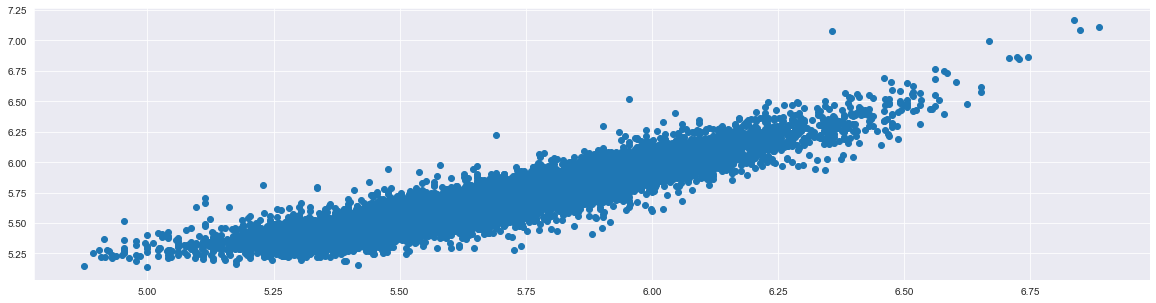

In [19]:
# let's visualize the latest model
prediction = regression_model.predict(indi_var)
plt.scatter(dep_var,prediction)
plt.savefig('regression_withlog10price_kc.png', transparent = True, bbox_inches="tight", dpi=600)
# we see that this latest model is much better at predicting home prices

In [ ]:
# how to improve the model in the future
# adding zip code plus 4 to get more granular groupings of home sales
# we could also transform the data where there were portions of a feature with little impact (views feature)